In [1]:
import numpy as np

In [4]:
# time axis
t = np.linspace(0, 999, 1000)

d = np.random.logseries
d[0:10, 0:20]


array([[0.53808969, 0.64119221, 0.57609167, 0.5727119 , 0.49175447,
        0.18421326, 0.66622621, 0.36600082, 0.21115599, 0.50750457,
        0.05007193, 0.29359875, 0.97746512, 0.47166255, 0.16993377,
        0.24307152, 0.69976061, 0.58436054, 0.80662703, 0.30117995],
       [0.73678257, 0.07422519, 0.12400413, 0.07227305, 0.0447118 ,
        0.19681219, 0.12648782, 0.53263824, 0.91134902, 0.83754942,
        0.26021475, 0.1903782 , 0.74768208, 0.8616741 , 0.14198796,
        0.81478509, 0.79321864, 0.55800428, 0.55139241, 0.12324864],
       [0.3898939 , 0.99306077, 0.34615163, 0.31915375, 0.70133977,
        0.87968761, 0.60057325, 0.70381978, 0.86588327, 0.77208735,
        0.61790426, 0.85438121, 0.1574297 , 0.88385823, 0.18229809,
        0.78957684, 0.53059175, 0.70773444, 0.01337   , 0.42201909],
       [0.92344356, 0.71770372, 0.50540646, 0.58869396, 0.21528663,
        0.03891824, 0.96952196, 0.65914529, 0.86140454, 0.69523719,
        0.65772759, 0.06005839, 0.68064558, 0

In [ ]:
def func_name(input parameters):
    ldakfjnlkasdj
    
    

In [10]:
# boolean indexing

td = d[:, (t >= 100) & (t<500)  ]

m = np.mean(td, axis = 1)
print(m)
print(m.shape)

[0.51248778 0.49595035 0.48773694 0.49245325 0.48820272 0.49135553
 0.4983952  0.4871187  0.49409725 0.50538852 0.52367097 0.48767195
 0.50621025 0.46544188 0.50472984 0.50788917 0.49756733 0.51069186
 0.49847128 0.46741671 0.50514388 0.49246009 0.48042723 0.50146728
 0.51371525 0.50579772 0.49944074 0.50529059 0.51319157 0.53704558
 0.48905276 0.49630486 0.4993973  0.50008504 0.50425477 0.4930017
 0.50595756 0.50767574 0.4869714  0.5156394  0.50329582 0.50006955
 0.51278945 0.48840086 0.49173796 0.50839198 0.51675678 0.52593336
 0.51613173 0.49263598 0.49555756 0.52947421 0.49154041 0.45213316
 0.50303333 0.49299759 0.47960292 0.48648422 0.49718787 0.51704536
 0.50728678 0.49838753 0.48356816 0.51227693 0.49983586 0.50244492
 0.50799256 0.48123961 0.48638352 0.48354782 0.52482939 0.50935532
 0.51176019 0.50343417 0.51980654 0.48267445 0.47851637 0.50357359
 0.49573964 0.51597002 0.50057486 0.50334684 0.49635338 0.50614805
 0.47618663 0.48810773 0.50269976 0.52910566 0.50449326 0.50219

In [7]:
idx = (t >= 100) & (t<500)
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Intro to FFT 

* js (jserences@ucsd.edu), for NEUG/PSYC 231 Fall 2022
* FFT is a linear transform from the time domain to the frequency domain. You can also invert this process and can move back and forth between time/frequency domains without losing information.
* FFT allows you to understand how much activity (power or amplitude) in different frequency bands is in your data - very useful especially for cyclical data like cortical oscillations or other periodic signals in timeseries data (housing market, weather, etc)...
* Can think about this (a bit loosely) as computing the correlation or dot product between the time domain signal and a series of sinusoids at different frequencies and different phases  

[scipy doc](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

![an illustration of the basic concept](http://www.spektrumanalizoru.com/images/time_vs_freq1.gif)

red is the timeseries, and in blue is the set of sinusoids that, when combined, recreate your timeseries. Then you can examine the amplitude and phase of these component signals to learn more about cyclical information in your data!

![nice animation](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

And here are some other examples of cyclical data...

![moon cycle](http://individual.utoronto.ca/kalendis/lunar/Waxing-Waning-periodic.gif)


![tides](https://www.nauticed.org/images/navclinic/sandiegotide.jpg)

* We can represent the amplitude (or power) and the phase of the sinusoid at each frequency by representing it on a complex plane. This is just like a normal x,y Cartesian plane, but the X axis is a real number and the y axis is an imaginary number


![polar coordinate interpretation](http://www.secretmango.com/jimb/Whitepapers/fft/notation_2.gif)


[website with nice geometric interpretation of dot product](https://jackschaedler.github.io/circles-sines-signals/dotproduct.html)


Equation for dot product: 
$\sum_{n=0}^{N-1} a[n] \cdot b[n]$

Again, you can loosely think about an FFT as the dot product of your timeseries data with a series of sinusoids at different frequencies, and if you play with the equation a bit, you'll see that the dot product is higher for signals that closely match. In the context of an FFT, the magnitude of this dot product - or match between the timeseries data and a particular sinusoid - is a measure of the amplitude of that frequency in your data. 

In [14]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt


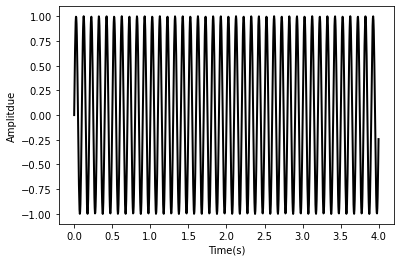

In [28]:
# simulate a signal to FFT
sr = 256  # sample rate (Hz)
f = 10   # frequency
tmax = 4 #duration of signals (s)
dt = 1 / sr
t = np.arange(0, tmax, dt)

# make the signal
sw = np.sin( 2*pi*f*t )

plt.plot(t, sw, 'k-', linewidth = 2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitdue')
plt.show()

In [29]:
# actually FFT the signal
sp = np.fft.rfft(sw)
sp[10]

(4.870468021087711e-14-1.451528154822698e-14j)

In [32]:
amp = np.abs(sp)

amp = ( amp / len(sw) ) * 2

# frequ step (x-axis for plotting results of the FFT)

# by hand way
freq_steps = 1 / tmax

print(freq_steps)

# built in way
freq_steps = np.fft.rfftfreq( len(sw), dt )


0.25


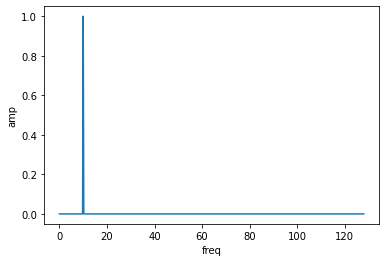

In [33]:
plt.plot(freq_steps, amp)
plt.xlabel('freq')
plt.ylabel('amp')
plt.show()

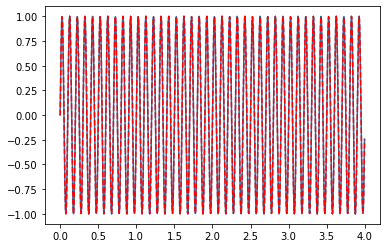

In [34]:
isp = np.fft.irfft(sp)

plt.plot(t, isp)
plt.plot(t, sw, 'r--')
plt.show()

## how to determine freq resolution

* FR = SR / N
* FR = SR / (SR * t)
* FR = 1 / t



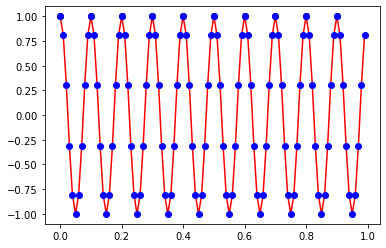

In [40]:
sr = 100 
f = 10
tmax = 1
dt = 1 / sr

t = np.arange(0, tmax, dt)

cw = np.cos( 2*pi*f*t )
plt.plot(t, cw, 'r')
plt.plot(t[::10], cw[::10], 'ko')
plt.plot(t[::], cw[::], 'bo')

plt.show()
